In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import boston_housing


(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Concatenate train and test data
all_data = np.concatenate((train_data, test_data), axis=0)
all_targets = np.concatenate((train_targets, test_targets), axis=0)

# Convert to DataFrame
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.DataFrame(data=all_data, columns=column_names[:-1])  # Exclude the target column
df['PRICE'] = all_targets  # Add target column

# Save DataFrame to CSV
df.to_csv('housing.csv', index=False)
df = pd.read_csv('housing.csv')

57026/57026 [==============================] - 0s 0us/step


In [ ]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
2,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
3,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
4,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3


In [ ]:
print(np.shape(df))

(506, 14)


In [ ]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  458.000000  458.000000  458.000000  458.000000  458.000000  458.000000   
mean     3.880713   10.180131   11.588166    0.058952    0.558875    6.156945   
std      8.973996   21.950057    6.756057    0.235792    0.117724    0.563489   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.084020    0.000000    5.860000    0.000000    0.453000    5.871250   
50%      0.256510    0.000000    9.900000    0.000000    0.538000    6.152000   
75%      4.082653    0.000000   18.100000    0.000000    0.624000    6.481750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  458.000000  458.000000  458.000000  458.000000  458.000000  458.000000   
mean    69.170524    3.807797    9.842795  417.893013   18.676201  353.521965   
std     28.008853    2.1250

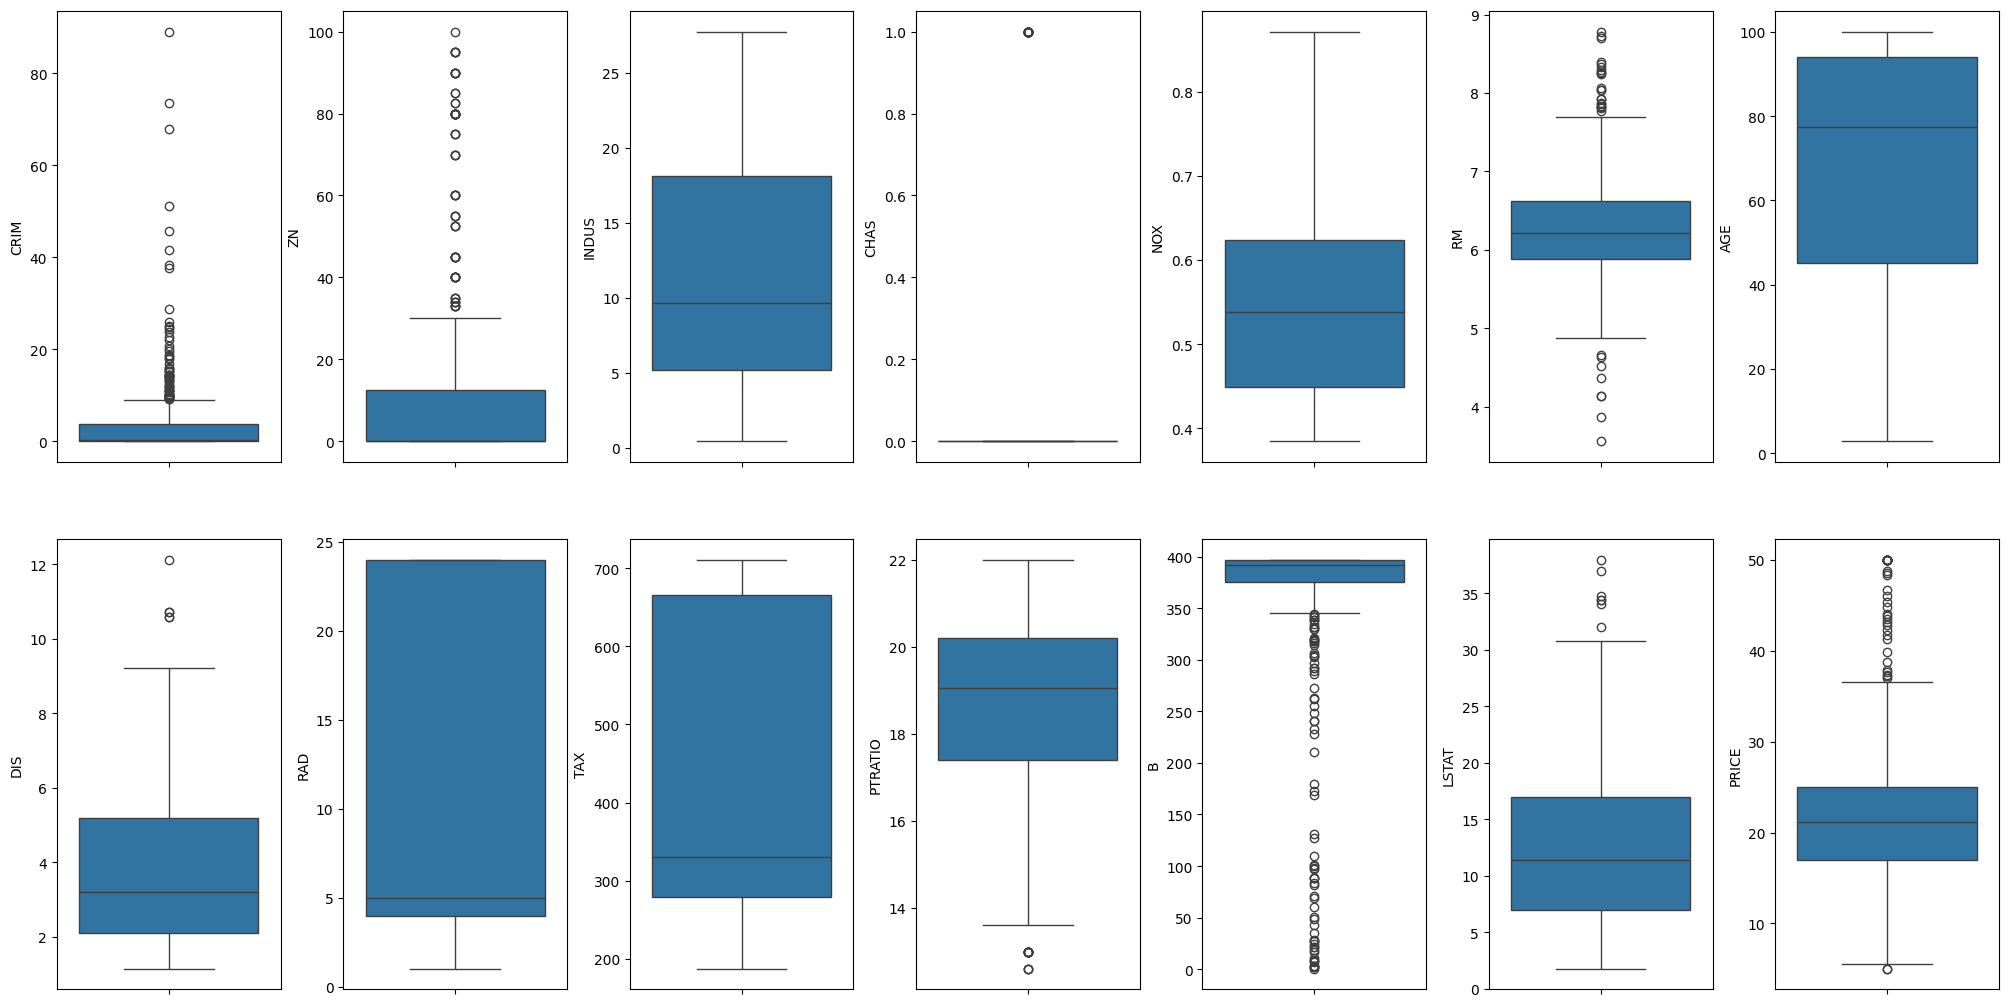

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
 for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


In [ ]:
df = df[~(df['PRICE'] >= 35.0)]
print(np.shape(df))

(458, 14)


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
2,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
3,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
4,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3


In [ ]:
print(df.shape)

(458, 14)


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,3.880713,10.180131,11.588166,0.058952,0.558875,6.156945,69.170524,3.807797,9.842795,417.893013,18.676201,353.521965,13.490699,20.320087
std,8.973996,21.950057,6.756057,0.235792,0.117724,0.563489,28.008853,2.125004,8.884462,168.736868,2.027875,95.363794,6.967358,6.185151
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.084020,0.000000,5.860000,0.000000,0.453000,5.871250,45.725000,2.100175,4.000000,287.000000,17.600000,373.105000,7.927500,16.200000
50%,0.256510,0.000000,9.900000,0.000000,0.538000,6.152000,78.400000,3.199200,5.000000,345.000000,19.200000,391.880000,12.370000,20.400000
75%,4.082653,0.000000,18.100000,0.000000,0.624000,6.481750,94.300000,5.214600,24.000000,666.000000,20.200000,396.397500,17.302500,23.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,34.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     458 non-null    float64
 1   ZN       458 non-null    float64
 2   INDUS    458 non-null    float64
 3   CHAS     458 non-null    float64
 4   NOX      458 non-null    float64
 5   RM       458 non-null    float64
 6   AGE      458 non-null    float64
 7   DIS      458 non-null    float64
 8   RAD      458 non-null    float64
 9   TAX      458 non-null    float64
 10  PTRATIO  458 non-null    float64
 11  B        458 non-null    float64
 12  LSTAT    458 non-null    float64
 13  PRICE    458 non-null    float64
dtypes: float64(14)
memory usage: 53.7 KB


**Visualization**

<Axes: xlabel='PRICE', ylabel='Count'>

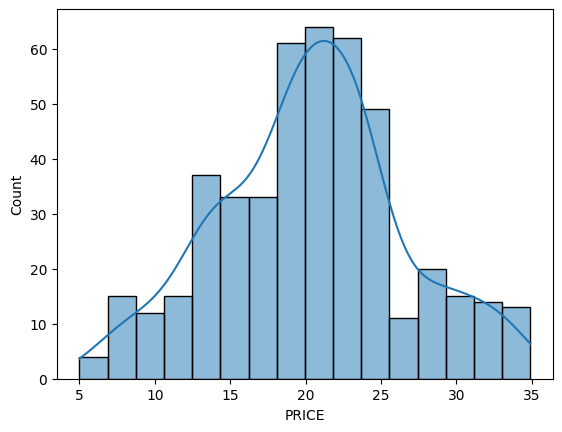

In [ ]:
import seaborn as sns
sns.histplot(df.PRICE , kde = True)

<Axes: ylabel='PRICE'>

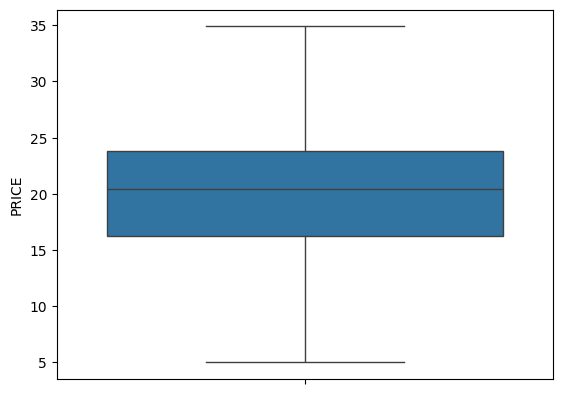

In [ ]:
sns.boxplot(df.PRICE)

In [ ]:
correlation = df.corr()
correlation.loc['PRICE']

CRIM      -0.509111
ZN         0.432791
INDUS     -0.598380
CHAS       0.098362
NOX       -0.584249
RM         0.540151
AGE       -0.571890
DIS        0.461164
RAD       -0.515860
TAX       -0.587285
PTRATIO   -0.471471
B          0.404020
LSTAT     -0.780531
PRICE      1.000000
Name: PRICE, dtype: float64

<Axes: >

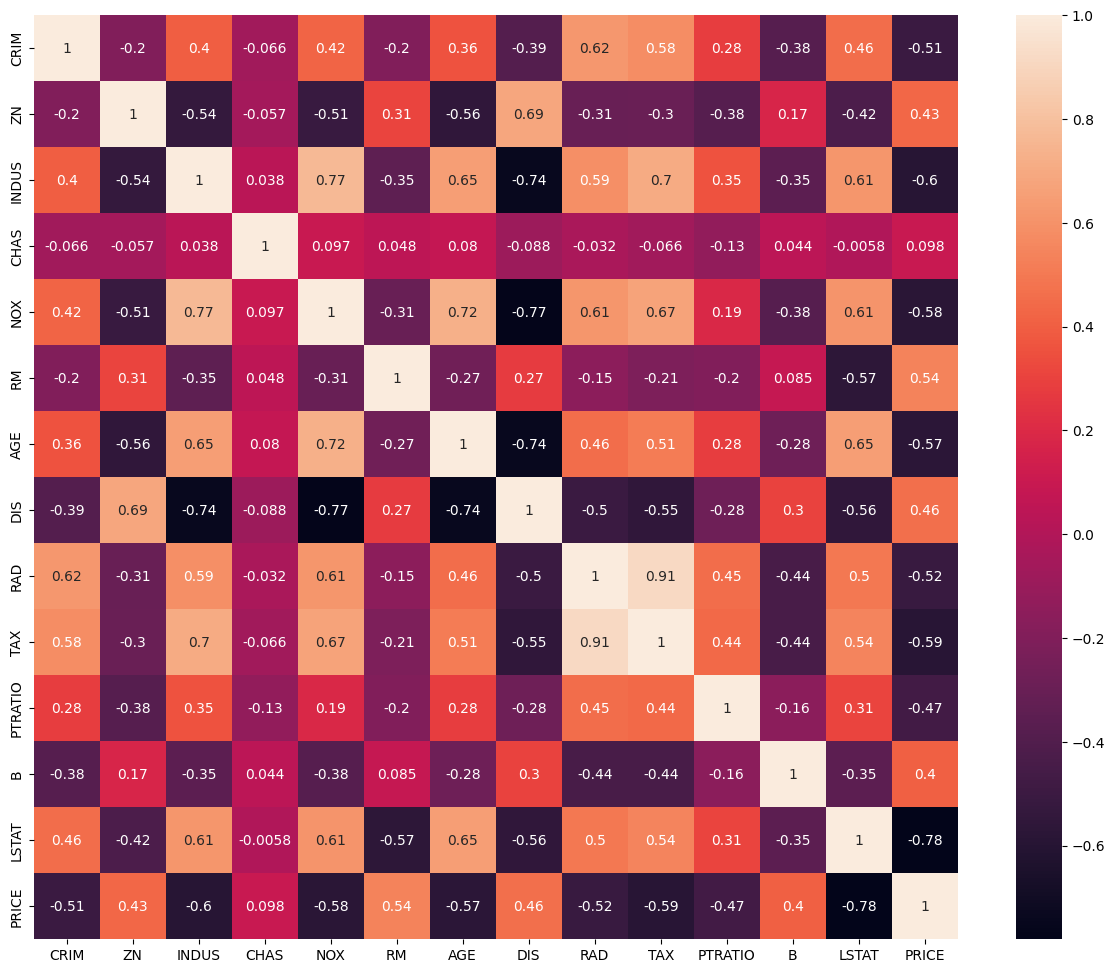

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

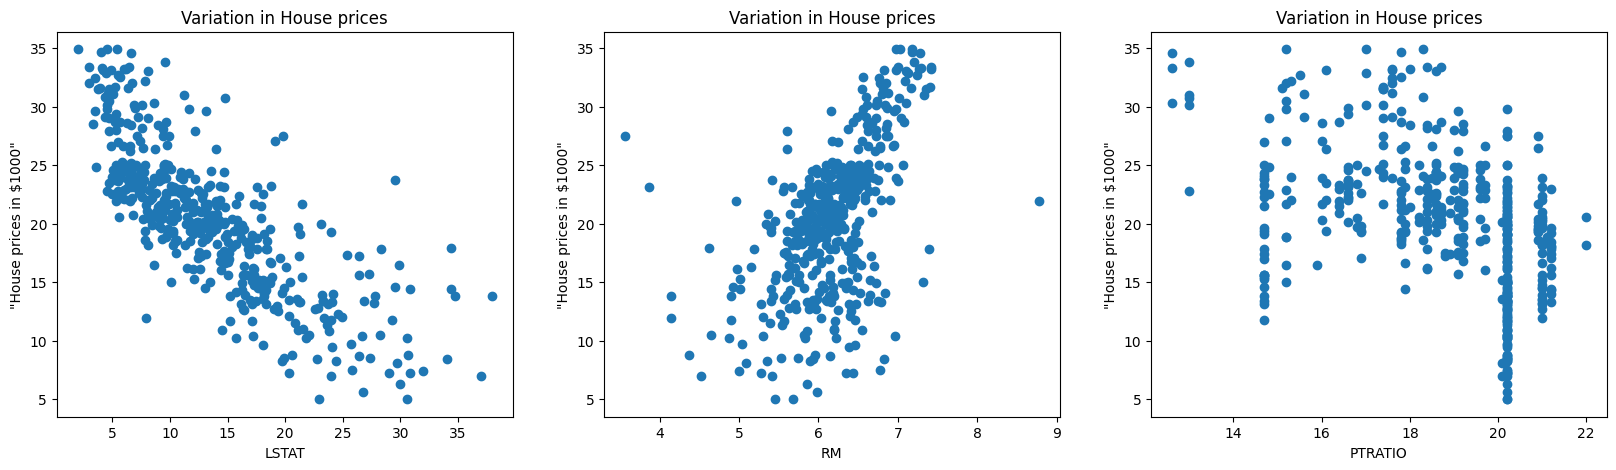

In [ ]:
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [ ]:
X = df.iloc[:,:-1]
y= df.PRICE

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

**Building the Model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.39631439267756


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.6844487162303876


**Neural Networks**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 445.6649
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 417.7429
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 337.8915
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 173.8250
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 55.2605
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 29.5454
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 21.0158
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 15.7623
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 13.3219
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 11.8466
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 10.8855
Epoch 12/100
12/12 [==============================] - 0s 3ms/step - loss: 10.2240
Epoch 13/100
12/12 [=

In [ ]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.6672936618399188


In [ ]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.487413521313821
